In [46]:
import numpy as np
import pandas as pd
import re

from scipy.spatial.distance import cosine
from gensim.models.keyedvectors import Vocab, KeyedVectors
from tqdm import tqdm_notebook

from sources import parse_glove_vocab

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [50]:
pd.options.display.max_rows = 1000

In [3]:
m1 = KeyedVectors.load_word2vec_format('../data/corpora/north-south/new-england.w2v.txt')

In [4]:
m2 = KeyedVectors.load_word2vec_format('../data/corpora/north-south/deep-south.w2v.txt')

In [23]:
vocab = parse_glove_vocab('../data/corpora/north-south/vocab.txt')

In [52]:
v1 = parse_glove_vocab('../data/corpora/north-south/new-england.vocab.txt')

In [53]:
v2 = parse_glove_vocab('../data/corpora/north-south/deep-south.vocab.txt')

In [24]:
m1_m = np.stack([m1[t] for t in vocab])

In [25]:
m2_m = np.stack([m2[t] for t in vocab])

In [44]:
bv = m1_m - m1_m.mean(0)

In [27]:
ov = m2_m - m2_m.mean(0)

In [28]:
m = ov.T.dot(bv)

In [29]:
u, _, v = np.linalg.svd(m)

In [30]:
ortho = u.dot(v)

In [31]:
m2_m_rotated = ov.dot(ortho)

In [32]:
vector_size = m2_m_rotated.shape[1]

m2r = KeyedVectors()
m2r.vector_size = vector_size
m2r.syn0 = np.zeros((len(m2_m_rotated), vector_size))

In [33]:
for i, (token, count) in enumerate(vocab.items()):
    m2r.syn0[i] = m2_m_rotated[i]
    m2r.index2word.append(token)
    m2r.vocab[token] = Vocab(index=i, count=count)

In [34]:
cosine(m1['god'], m2r['god'])

0.12621340328341646

In [35]:
len(m1['god'])

200

In [36]:
len(m1.vocab)

8105

In [256]:
data = []
for token in tqdm_notebook(vocab.keys()):
    
    if not re.match('^[a-z]+$', token):
        continue
    
    sim = 1-cosine(m1[token], m2r[token])
    
    c1 = v1[token]
    c2 = v2[token]

    cr = min([c1, c2]) / max([c1, c2])
    
    data.append((token, vocab[token], c1, c2, cr, sim))

HBox(children=(IntProgress(value=0, max=8104), HTML(value='')))

In [257]:
df = pd.DataFrame(data, columns=('token', 'tc', 'c1', 'c2', 'cr', 'sim'))

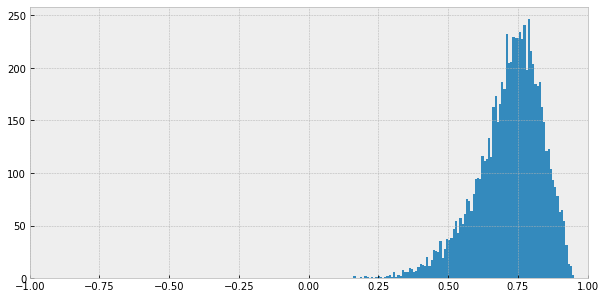

In [258]:
plt.figure(figsize=(10, 5))
plt.xlim(-1, 1)
_ = plt.hist(df['sim'], bins=100)

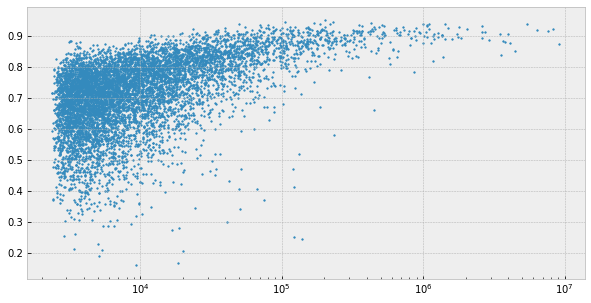

In [266]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.scatter(df['tc'], df['sim'], s=3)

In [270]:
df.sort_values('sim', ascending=True).head(100)

,token,tc,c1,c2,cr,sim
3160,ian,9258,2026,7232,0.280144,0.159913
1755,auburn,18478,1506,16972,0.088734,0.167013
4946,mc,5073,1727,3346,0.516139,0.189675
1633,sec,20054,9022,11032,0.817803,0.204752
4790,troy,5318,1290,4028,0.320258,0.207343
6605,shelton,3368,1115,2253,0.494896,0.213441
4988,dale,5019,1340,3679,0.364229,0.229095
278,ma,139016,118791,20225,0.170257,0.243730
317,ga,122202,5259,116943,0.044971,0.251309
7197,harley,2889,1393,1496,0.931150,0.254417


In [272]:
', '.join(list(df.sort_values('sim', ascending=True).head(100)['token']))

'ian, auburn, mc, sec, troy, shelton, dale, ma, ga, harley, riley, mississippi, exp, jungle, tru, alley, brandon, oo, springs, nu, augusta, julie, rome, tr, fleet, portland, opponent, flame, labels, rivers, mason, ward, satellite, db, ought, rebel, palace, ct, skip, wicked, carl, hiphop, barnes, ron, columbus, mud, cont, chad, loop, ace, intro, diesel, carter, wk, jesse, brad, wright, pct, index, hc, cow, wallace, foster, al, takeover, chloe, ebook, ju, revival, ge, rogers, ferry, samples, tags, pump, tina, doc, opera, vince, janet, void, hills, temple, cb, lindsey, fred, freeze, sp, cr, perfil, stewart, charles, studios, marc, affair, naughty, shawn, eddie, showcase, chi'

In [71]:
df[df['tc'] > 100000].sort_values('d', ascending=False).head(100)

,token,tc,c1,c2,cr,d
278,ma,139016,118791,20225,0.170257,0.756270
317,ga,122202,5259,116943,0.044971,0.748691
320,atlanta,121696,4443,117253,0.037892,0.587556
326,boston,119931,113541,6390,0.056279,0.530202
292,town,132265,20592,111673,0.184396,0.479746
160,rt,235762,80242,155520,0.515959,0.418445
90,lt,450744,212466,238278,0.891673,0.339484
205,playing,186940,62088,124852,0.497293,0.327844
376,gone,102560,21463,81097,0.264658,0.320820
281,left,137542,69479,68063,0.979620,0.288568


In [230]:
df[(df['tc'] > 100000) & (df['cr'] > 0.8)].sort_values('d', ascending=False).head(50)

,token,tc,c1,c2,cr,d
90,lt,450744,212466,238278,0.891673,0.339484
281,left,137542,69479,68063,0.979620,0.288568
329,end,119030,56077,62953,0.890776,0.229972
314,must,123256,54950,68306,0.804468,0.229343
52,now,860101,385685,474416,0.812968,0.217925
149,w,260984,117267,143717,0.815958,0.208849
349,point,109751,56655,53096,0.937181,0.203889
375,post,102621,48524,54097,0.896981,0.200223
306,open,126440,57535,68905,0.834990,0.200125
218,also,177247,94889,82358,0.867940,0.195699


In [284]:
', '.join(list(df[(df['tc'] > 100000) & (df['cr'] > 0.8)].sort_values('sim').head(50)['token']))

'lt, left, end, must, now, w, point, post, open, also, times, click, another, which, here, first, state, remember, wow, over, pretty, support, house, s, guys, guy, story, while, call, says, made, summer, right, job, and, via, without, believe, little, fun, might, tweet, us, full, away, most, work, true, thought, needs'

In [276]:
def compare(token, topn=20):
    
    print('North')
    print('---')
    print(', '.join([t for t, _ in m1.most_similar(token, topn=topn)]))
    
    print('---')

    print('South')
    print('---')
    print(', '.join([t for t, _ in m2r.most_similar(token, topn=topn)]))

In [291]:
compare('job', 20)

North
---
jobs, interview, hiring, opportunity, interviews, description, work, great, assistant, position, manager, doing, senior, looking, fantastic, ☆★☆, hired, career, working, quit
---
South
---
engineer, jobs, senior, manager, engineering, software, assistant, project, hiring, application, work, developer, intern, great, research, technical, analyst, consultant, looking, opportunity


In [162]:
def north_minus_south(token, topn=30):
    return m1.similar_by_vector(m1[token] - m2r[token], topn=topn)

In [163]:
def south_minus_north(token, topn=30):
    return m2r.similar_by_vector(m2r[token] - m1[token], topn=topn)

In [309]:
', '.join([t for t, _ in north_minus_south('trump')])

'method, frog, logical, ப, pun, ட, ang, crab, needing, fil, naman, spinner, بس, fidget, nooooo, atm, particular, kitten, ما, bunny, slot, gate, yung, motel, وأعوذ, wiz, 😹, golden, 😭😭😭😭😭, emotion'

In [310]:
', '.join([t for t, _ in south_minus_north('trump')])

'trump, ryan, turn, georgia, matt, alabama, atlanta, sale, boost, levels, weekend, homes, team, women, supporters, bryan, impact, media, white, mobile, bash, price, property, photos, s, turned, administration, group, air, recap'